In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle

from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
Sample='carina'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

CarN=dict()
Car=dict()


for i in range(len(samples)):
    CarN[i]=samples[0][i]
    
for i in range(len(samples)):
    Car[i]=pd.read_csv('SFdata//'+CarN[i]+'.csv')    

samples

,0
0,CarB2
1,CarR2
2,Car2


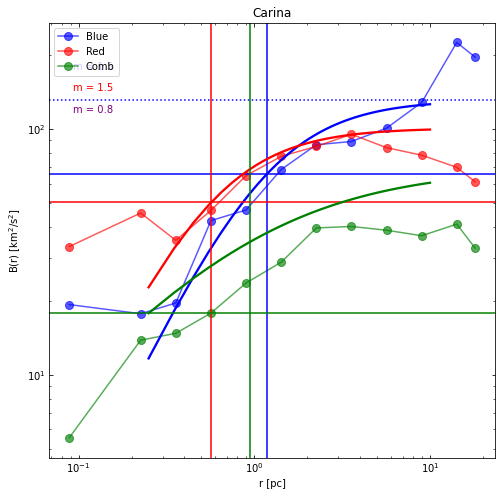

In [4]:
fig, ax=plt.subplots(figsize=(8,8))

plt.loglog(Car[0].pc,Car[0].S,marker='o',color="blue",alpha=0.65,label="Blue",markersize="8")
plt.loglog(Car[1].pc,Car[1].S,marker='o',color="red",alpha=0.65,label="Red",markersize="8")
plt.loglog(Car[2].pc,Car[2].S,marker='o',color="green",alpha=0.65,label="Comb",markersize="8")

plt.axhline(y=8.1**2, color='blue', linestyle='-')
plt.axvline(x=1.18, color='blue', linestyle='-')
plt.axhline(y=2*8.1**2, color='blue', linestyle=':')

lo=1.18
ss=8.1**2
n=1.5
x=np.linspace(0.25,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='blue', linestyle='-',linewidth='2.3')

plt.axhline(y=7.1**2, color='red', linestyle='-')
plt.axvline(x=0.57, color='red', linestyle='-')

lo=0.57
ss=7.1**2
n=1.5
x=np.linspace(0.25,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='red', linestyle='-',linewidth='2.3')


plt.axhline(y=4.22**2, color='green', linestyle='-')
plt.axvline(x=0.95, color='green', linestyle='-')

lo=0.95
ss=5.9**2
n=0.8
x=np.linspace(0.25,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='green', linestyle='-',linewidth='2.3')

plt.legend()
plt.title('Carina')

ax.text(0.1, 0.9,'m = 1.5', ha='center', va='center', transform=ax.transAxes, color='blue')
ax.text(0.1, 0.85,'m = 1.5', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.1, 0.8,'m = 0.8', ha='center', va='center', transform=ax.transAxes, color='purple')


ax.set(xlabel='r [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
#plt.grid(which='minor')


In [5]:
B=Car[0].S
r=Car[0].pc

In [6]:
rgrid = np.logspace(0.0, 2)

s0 = (0.011*.92)/2.355             
m = 1.5

sig2 = 7.1**2
r0 = 0.58

In [7]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [8]:
relative_uncertainty = 0.2
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 1.5

In [9]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.2)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2      50.41        0      inf    False    


In [10]:
result2 = model02.fit(
    B, 
    weights=weights,
    r=r, r0=r0, m=m, s0=s0, noise=1/10,
)

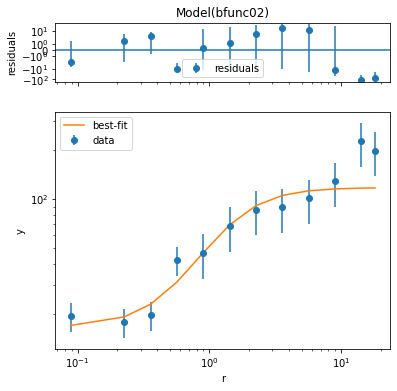

In [11]:
fig, _ = result2.plot()
fig.axes[0].set(
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale="log",
    yscale="log",
);

In [12]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 12
    # variables        = 4
    chi-square         = 8.01501582
    reduced chi-square = 1.00187698
    Akaike info crit   = 3.15692133
    Bayesian info crit = 5.09654793
##  Warning: uncertainties could not be estimated:
    s0:     at initial value
[[Variables]]
    r0:     1.35168313 (init = 0.58)
    sig2:   50.41 (fixed)
    m:      2.03995531 (init = 1.5)
    s0:     0.00429724 (init = 0.00429724)
    noise:  16.5732347 (init = 0.1)


In [13]:
for p in result2.model.param_names:
    result2.params[p].stderr = result2.params[p].value * 0.1

In [14]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=9.891478643454162e-06 < 1e-05 at iteration 63 and prob(m=14.891673729188417) = 0.9885180068051833 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(s0=0.003867515923566822) = 0.0 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(s0=0.0047269639065816715) = 0.0 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(noise=0.0) = 0.9922549257115539 < max(sigmas)
  warn(errmsg)


          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :  -0.71729  -0.52167  -0.29623   1.35168  +0.47858  +1.53222  +6.28617
 m    :  -1.49138  -0.96660  -0.50906   2.03996  +0.73579  +2.39814      +inf
 s0   :      -inf      -inf      -inf   0.00430      +inf      +inf      +inf
 noise:      -inf  -9.08854  -3.59678  16.57323  +3.15721  +6.63502 +11.32291


In [15]:
plt.style.use([
    "seaborn-poster",
])

In [16]:
plot_limits = {
    "s0": [0.0, 0.1],
    "m": [0.1, 1.7],
    "r0": [0.4, 5.0],
    "noise": [0.0, 2.0],
}

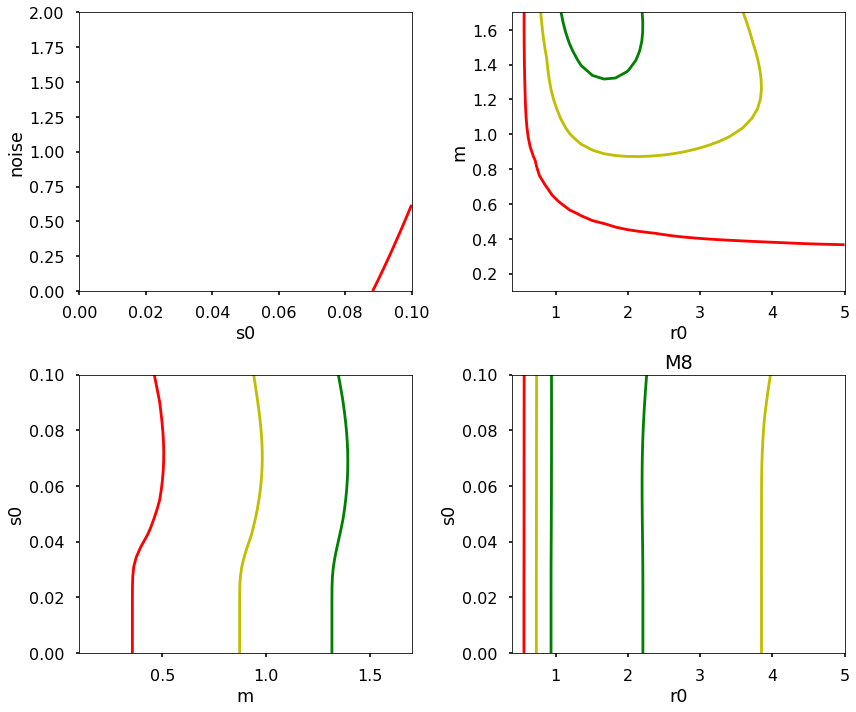

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('M8')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [18]:
x=r
y=B-2*sig2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([5.66057023])

In [19]:
r.max()/result2.params['r0'].value

13.353873143153725

In [20]:
(r[3]/2**0.5)*((result2.params['r0'].value/r[3])**(result2.params['m'].value/2))

0.9725463476609396

In [21]:
f = open('CI//Car.pkl',"wb")
pickle.dump(result2,f)
f.close()

In [22]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 522.298216342926 seconds ---
